<a href="https://colab.research.google.com/github/missjaanii/WheatseedKNN/blob/master/KNN_Cluster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files 
uploaded = files.upload()

Saving Seed_Data.csv to Seed_Data (1).csv


In [0]:
df = pd.read_csv('Seed_Data.csv')
df.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [0]:
from google.colab import files 
uploaded = files.upload()

Saving Coded_Data.csv to Coded_Data.csv


In [0]:
df1=pd.read_csv('Coded_Data.csv')
df1.head()

,Unnamed: 0,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
0,1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
1,2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
2,3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
3,4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
4,5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In [0]:
# In Our Dataset or Dataframe , The First Column looks like the index, let's set index_col=0
df=pd.read_csv('Seed_Data.csv',index_col=0)
df

,P,C,LK,WK,A_Coef,LKG,target
A,,,,,,,
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...
12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2


In [0]:
df1=pd.read_csv('Coded_Data.csv',index_col=0)
df1.head()

,Cd_1,Cd_2,Cd_3,Cd_4,Cd_5,Cd_6,Cd_7,Cd_8,Cd_9,Cd_10,Result
1,53.1,63.4,33.0,46.2,47.3,21.2,44.3,36.1,46.6,65.0,Y
2,36.9,54.7,31.1,50.5,56.0,38.9,39.4,56.8,33.0,78.8,N
3,41.9,65.5,53.5,52.3,92.5,43.2,94.9,64.7,50.8,67.9,N
4,71.7,75.6,37.9,50.5,69.2,52.5,82.3,77.3,80.8,60.9,Y
5,74.3,51.8,36.4,40.9,74.7,42.2,65.1,36.2,77.6,74.9,Y


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Float64Index: 210 entries, 15.26 to 12.3
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   P       210 non-null    float64
 1   C       210 non-null    float64
 2   LK      210 non-null    float64
 3   WK      210 non-null    float64
 4   A_Coef  210 non-null    float64
 5   LKG     210 non-null    float64
 6   target  210 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 13.1 KB


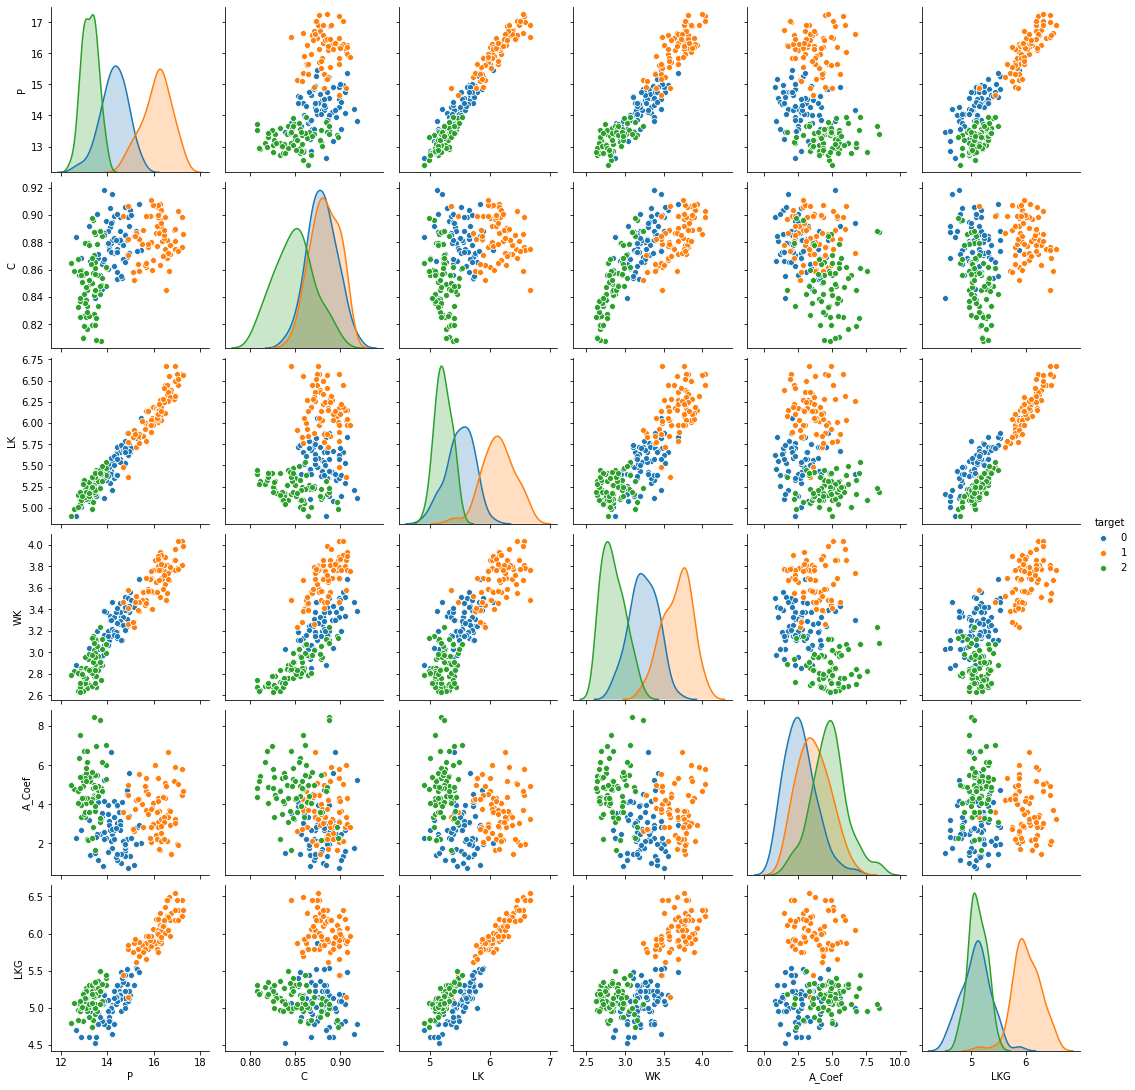

In [0]:
sns.pairplot(df,hue='target')

Variable Standardization

We have to Identify the datapoints that are nearest to the test data point ( majority voting based on the k value). In This Case , the of the features does matter. variables with larger scale will have larger effect on the distance between the observations and also on the KNN classifier 

We need to do the Standardization of the variable first on the same scale to deal with the problem ( unsupervised)

In [0]:
# To Resolve the Problem - StandardScaler from sklearn and also need to create StandardScaler() object

#Importing

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Let's Split the data , then only we can fit the scaler to the features

In [0]:
df

,P,C,LK,WK,A_Coef,LKG,target
A,,,,,,,
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...
12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2


In [0]:
# Features and Results/target

target = df['target']
features = df.drop('target',axis=1)

In [0]:
features.head()

,P,C,LK,WK,A_Coef,LKG
A,,,,,,
15.26,14.84,0.8710,5.763,3.312,2.221,5.220
14.88,14.57,0.8811,5.554,3.333,1.018,4.956
14.29,14.09,0.9050,5.291,3.337,2.699,4.825
13.84,13.94,0.8955,5.324,3.379,2.259,4.805
16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [0]:
target.head()

A
15.26    0
14.88    0
14.29    0
13.84    0
16.14    0
Name: target, dtype: int64

In [0]:
# Let's fit scaler to the features 

scaler.fit(df.drop('target',axis=1))
scaler.fit(features)

StandardScaler(copy=True, with_mean=True, with_std=True)

So, We have the fitted features to the scaler object, We will use this scaler object to transform all the features using .transform() method

In [0]:
scaled_features = scaler.transform(features)

In [0]:
type(scaled_features)

numpy.ndarray

In [0]:
# Scaled_features is a numericalpython array, Let's conver this array into the pandas DataFrame

# We can use our df.columns to get the columns name and pass that to DataFrame along with scaled_features,we dont need Results

cols = df.columns[:-1]
cols

Index(['P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'], dtype='object')

In [0]:
df

,P,C,LK,WK,A_Coef,LKG,target
A,,,,,,,
15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0
...,...,...,...,...,...,...,...
12.19,13.20,0.8783,5.137,2.981,3.631,4.870,2
11.23,12.88,0.8511,5.140,2.795,4.325,5.003,2
13.20,13.66,0.8883,5.236,3.232,8.315,5.056,2


In [0]:
cols = df.columns[:-1]
cols

Index(['P', 'C', 'LK', 'WK', 'A_Coef', 'LKG'], dtype='object')

In [0]:
df_scaled_features = pd.DataFrame(scaled_features,columns=cols)
df_scaled_features.head()

,P,C,LK,WK,A_Coef,LKG
0,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356


In [0]:
# Let's Try to Split into Test and Train

from sklearn.model_selection import train_test_split

In [0]:
X = scaled_features
y= target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.475,random_state=101)

Our Main Objective is to generate a model that can predict the class in results for a new data point , Lets Start with K=1
A
B
Both A & B
All of the Above
None of These

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Let's Create KNN model instance with n_neighbors=1
knn = KNeighborsClassifier(n_neighbors=1)

In [0]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
predictions = knn.predict(X_test)

In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[29  2  5]
 [ 1 24  0]
 [ 2  0 37]]
              precision    recall  f1-score   support

           0       0.91      0.81      0.85        36
           1       0.92      0.96      0.94        25
           2       0.88      0.95      0.91        39

    accuracy                           0.90       100
   macro avg       0.90      0.90      0.90       100
weighted avg       0.90      0.90      0.90       100



Eblow Method is used to find out good value of K 
We will get the error rate for every K value and plot against k to find out its optimum state/values



In [0]:
# Initializing an empty list to get error rate for K
err_rate = [] 

# Now Run for loop K from 1 to 30 

for i in range(1,30):

  #Initialize knn for k =i 

  knn=KNeighborsClassifier(n_neighbors=1)

  # fitting knn

  knn.fit(X_train,y_train)

  #Predicting for K 

  predictions_i = knn.predict(X_test)

  err_rate.append(np.mean(predictions_i != y_test))

Text(0, 0.5, 'Error_Rate')

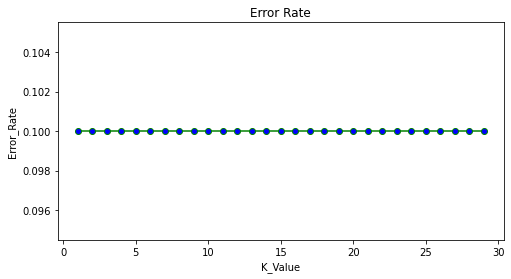

In [0]:
plt.figure(figsize=(8,4))
plt.plot(range(1,30),err_rate,color='green',
         marker='o',markerfacecolor='blue')
plt.title('Error Rate')
plt.xlabel('K_Value')
plt.ylabel('Error_Rate')